In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("banknotes.csv")
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.shape

(1372, 5)

In [5]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [6]:
x = df.drop('Class', axis=1)
y = df['Class']

<Axes: xlabel='Class', ylabel='count'>

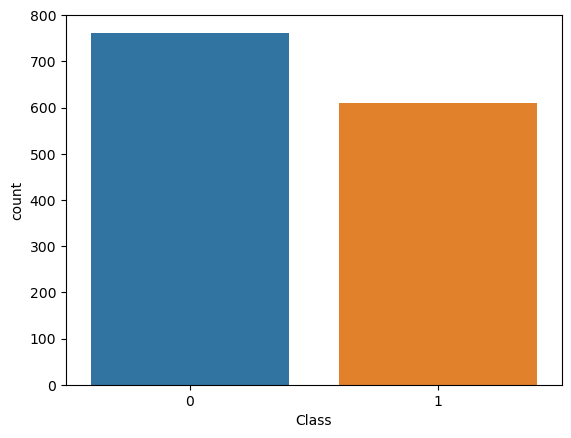

In [7]:
sns.countplot(x = y)

In [8]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

### Cross Validation

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, random_state=0, test_size=0.25)

In [11]:
x_train.shape

(1029, 4)

In [12]:
y_train.shape

(1029,)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier(random_state=0)

In [15]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Evaluation

In [16]:
y_pred = dt.predict(x_test)

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

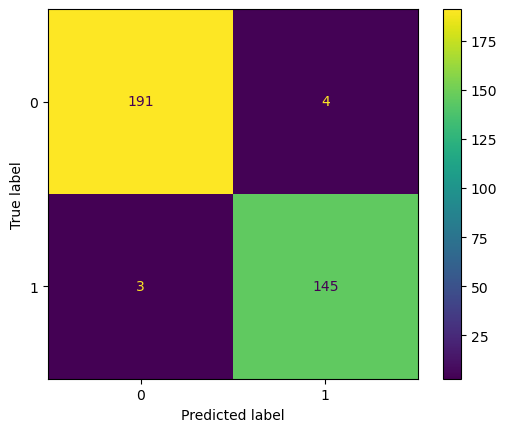

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



### K-Means 

In [20]:
df=pd.read_csv('Mall_Customers.csv')

In [21]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
x = df.iloc[: , [3,4]]

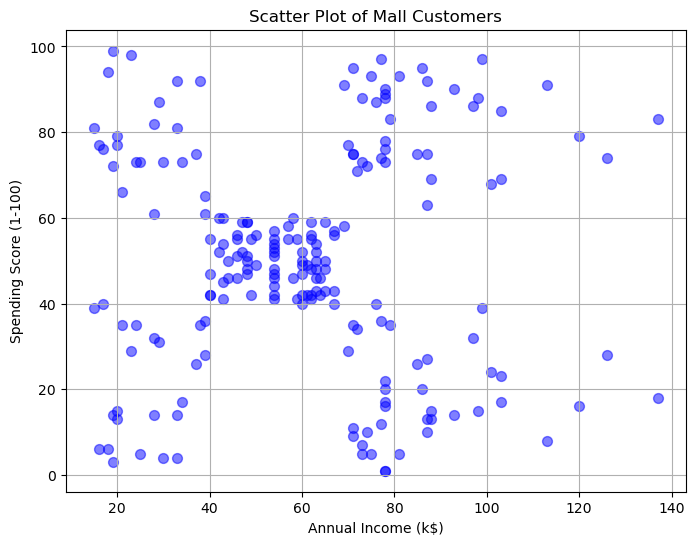

In [23]:

plt.figure(figsize=(8, 6))
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s=50, color='blue', alpha=0.5)
plt.title('Scatter Plot of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

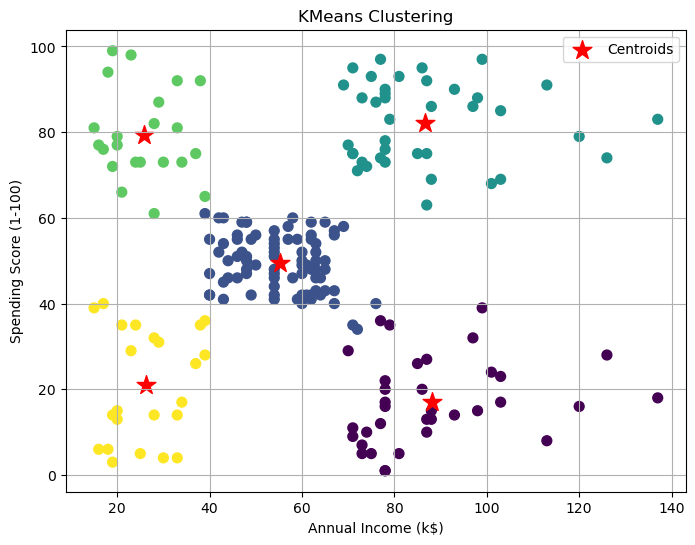

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
kmeans.inertia_

44448.45544793371

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

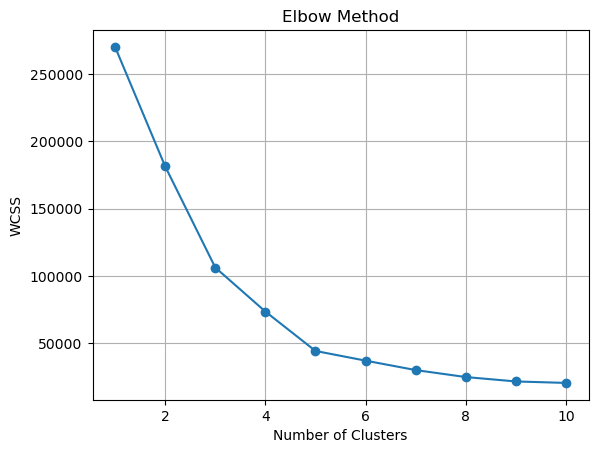

In [29]:
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [31]:
    sse = []
for k in range(1,16):
     kmeans = KMeans(n_clusters= k)
     kmeans.fit_predict(x)
     sse.append(kmeans.inertia_)

In [32]:
sse

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30566.45113025186,
 25043.89004329005,
 21818.114588452183,
 19636.753964898155,
 17595.28888108518,
 15838.717785514084,
 14264.76869535693,
 13319.15527053356,
 11970.169290006816]

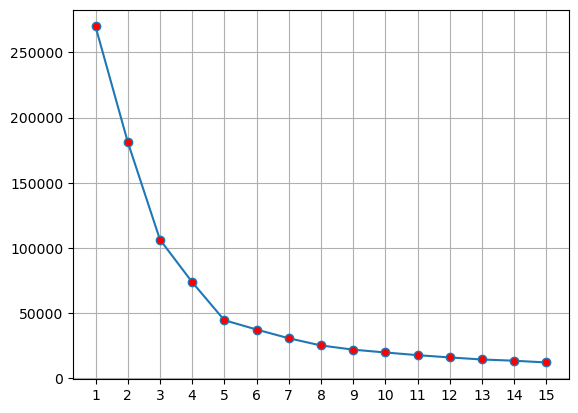

In [33]:
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker = "o", mfc ='r');
plt.grid()